In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
import warnings

In [ ]:
# Ignore warnings for better readability
warnings.filterwarnings("ignore")

In [ ]:
# Make sure to register converters to avoid warnings
register_matplotlib_converters()

In [ ]:
df=pd.read_csv('/content/Quote-Equity-TATAMOTORS-EQ-13-09-2023-to-13-09-2024.csv')

In [ ]:
print(df.columns)

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


In [ ]:
# Load dataset
df = pd.read_csv('/content/Quote-Equity-TATAMOTORS-EQ-13-09-2023-to-13-09-2024.csv', parse_dates=['Date '], index_col='Date ')

In [ ]:
# Inspect the data
print(df.head())

           series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
Date                                                                      
2024-09-12      EQ    976.30    988.00    958.00       976.30    984.00   
2024-09-11      EQ  1,000.00  1,011.55    971.25     1,035.80    976.40   
2024-09-10      EQ  1,049.00  1,049.00  1,032.20     1,038.70  1,035.00   
2024-09-09      EQ  1,049.35  1,049.95  1,026.25     1,049.35  1,040.80   
2024-09-06      EQ  1,068.80  1,072.95  1,040.50     1,069.15  1,050.65   

              close      vwap     52W H   52W L       VOLUME   \
Date                                                            
2024-09-12    986.15    973.48  1,179.00   608.3  2,56,75,836   
2024-09-11    976.30    983.79  1,179.00   608.3  3,61,40,411   
2024-09-10  1,035.80  1,038.72  1,179.00   608.3    69,19,238   
2024-09-09  1,038.70  1,035.04  1,179.00   608.3    72,06,054   
2024-09-06  1,049.35  1,051.98  1,179.00   605.6    87,17,377   

                  

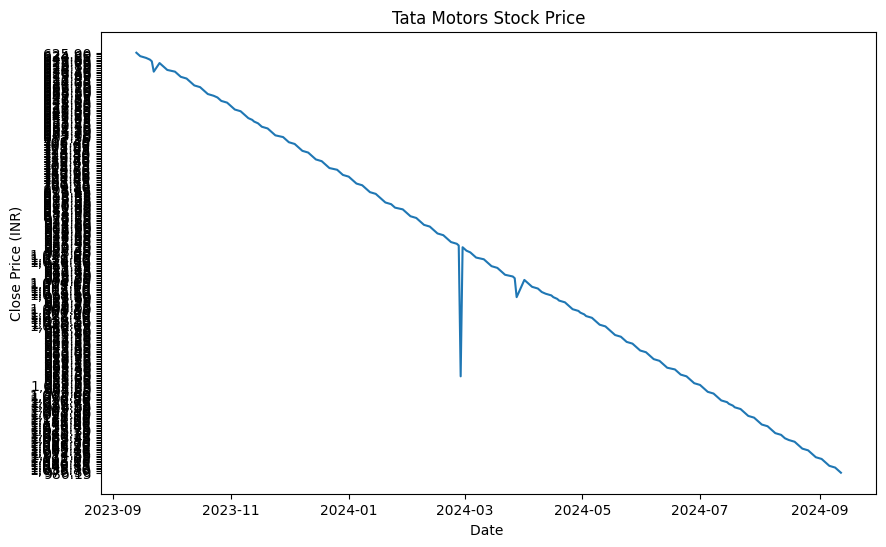

In [ ]:
# Visualize the 'Close' price data
plt.figure(figsize=(10,6))
plt.plot(df['close '])
plt.title('Tata Motors Stock Price')
plt.xlabel('Date ')
plt.ylabel('Close Price (INR)')
plt.show()

In [ ]:
# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64


In [ ]:
print(df.dtypes)

series            object
OPEN              object
HIGH              object
LOW               object
PREV. CLOSE       object
ltp               object
close             object
vwap              object
52W H             object
52W L            float64
VOLUME            object
VALUE             object
No of trades      object
dtype: object


In [ ]:
# Convert 'close' column to numeric
df['close '] = pd.to_numeric(df['close '],errors='coerce')

In [ ]:
# Differencing to check stationarity
df_diff = df['close '].diff().dropna()


In [ ]:
# Differencing to check stationarity
df_diff = df['close '].diff().dropna()

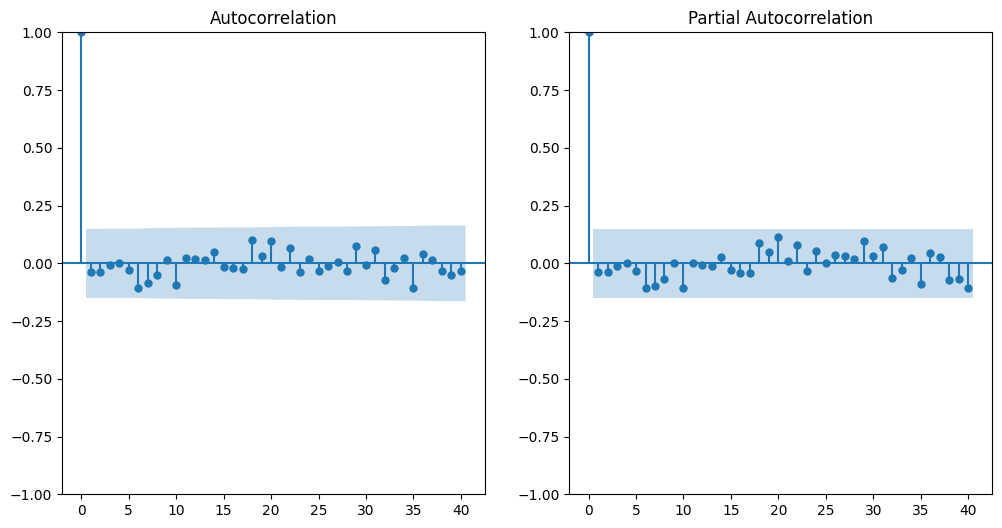

In [ ]:
# Plot ACF and PACF to identify AR and MA terms
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df_diff, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(df_diff, lags=40, ax=plt.gca())
plt.show()

In [ ]:
# ARIMA Model Selection
# Based on ACF/PACF you can manually adjust the p, d, q parameters.
# Example: ARIMA(p, d, q) = (1, 1, 1)
model = ARIMA(df['close '], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 close    No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -716.727
Date:                Wed, 25 Sep 2024   AIC                           1439.454
Time:                        13:46:51   BIC                           1449.982
Sample:                             0   HQIC                          1443.693
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2340      2.207      0.106      0.916      -4.091       4.559
ma.L1         -0.2601      2.188     -0.119      0.905      -4.548       4.028
sigma2       155.7272     12.321     12.639      0.0

In [ ]:
# Forecast the future values
forecast = model_fit.forecast(steps=30)  # Forecast for next 30 days
print("Forecasted values:\n", forecast)

Forecasted values:
 248    625.940297
249    625.949726
250    625.951932
251    625.952448
252    625.952569
253    625.952597
254    625.952604
255    625.952606
256    625.952606
257    625.952606
258    625.952606
259    625.952606
260    625.952606
261    625.952606
262    625.952606
263    625.952606
264    625.952606
265    625.952606
266    625.952606
267    625.952606
268    625.952606
269    625.952606
270    625.952606
271    625.952606
272    625.952606
273    625.952606
274    625.952606
275    625.952606
276    625.952606
277    625.952606
Name: predicted_mean, dtype: float64


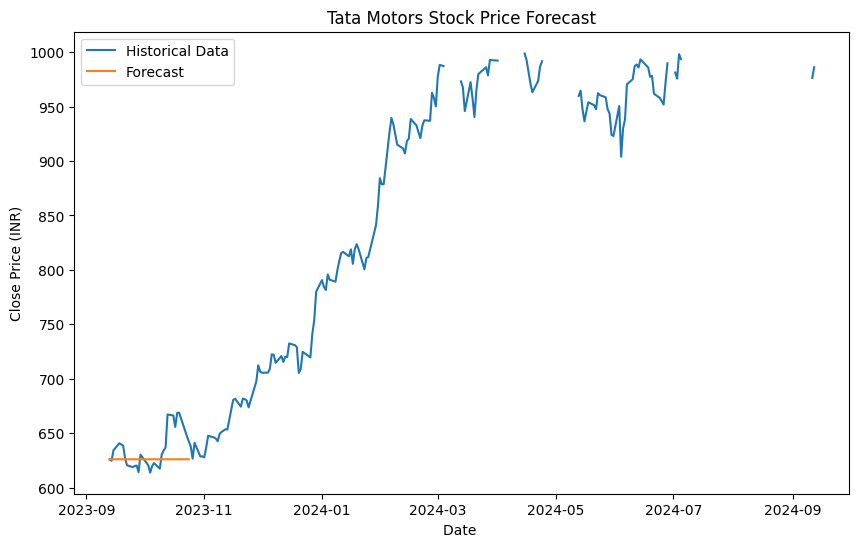

In [ ]:
# Visualize the forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['close '], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast, label='Forecast')
plt.title('Tata Motors Stock Price Forecast')
plt.xlabel('Date ')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()